
# Morphology: Profiles and Gini Coefficients

In [8]:
def get_psf_profile(line,obstype,weighting,bins):
    im = image(line,obstype,weighting+'_psf')
    y0,x0 = np.unravel_index(np.nanargmax(im.data), im.data.shape)
    im.x0, im.y0 = x0, y0
    bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
    return bc, sb

## Image-plane radial profiles

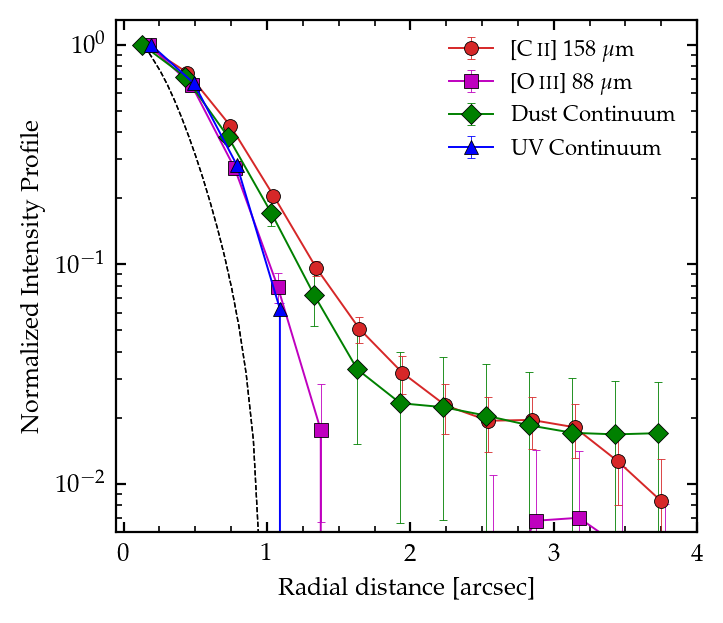

In [2]:
from base import *
fig, ax = plt.subplots(1,1,figsize=(3.5,3))

weighting = 'natural_uv0.5'
psfmatch = ('OIII','continuum',weighting)
bins = np.arange(0.01, 4, 0.3)
offset = 0.015

im = image('CII','linemfs','natural_uv0.7')
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
# sb[sb/sb_err < 2] = np.nan
ax.errorbar(bc-offset, sb, yerr=sb_err, label=r'[C\,\textsc{ii}] $158~\mu$m', 
             ls='-', linewidth=0.7, color='tab:red', ecolor='tab:red', mec='k', mew=0.3, ms=5, marker='o', capsize=1.5, capthick=0.3, elinewidth=0.3)

im = image('OIII','linemfs',weighting)
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
# sb[sb/sb_err < 2] = np.nan
ax.errorbar(bc+offset, sb, yerr=sb_err, label=r'[O\,\textsc{iii}] $88~\mu$m', 
             ls='-', linewidth=0.7, color='m', ecolor='m', mec='k', mew=0.3, ms=5, marker='s', capsize=1.5, capthick=0.3, elinewidth=0.3)

im1 = image('CII','continuum','natural_uv0.7')
im2 = image('NII','continuum',weighting)
im3 = image('OIII','continuum',weighting)
bc1, sb1, sb_err1 = im1.RadialProfile(normalized=False, bins=bins)
bc2, sb2, sb_err2 = im2.RadialProfile(normalized=False, bins=bins)
bc3, sb3, sb_err3 = im3.RadialProfile(normalized=False, bins=bins)
bc = bc1
sb = sb1+sb2+sb3
sb_err = np.sqrt(sb_err1**2 + sb_err2**2 + sb_err3**2)
sb_err /= np.max(sb)
sb /= np.max(sb)
# sb[sb/sb_err < 2] = np.nan

ax.errorbar(bc-2*offset, sb, yerr=sb_err, label='Dust Continuum',
            ls='-', linewidth=0.7, color='g', ecolor='g', mec='k', mew=0.3, ms=5, marker='D', capsize=1.5, capthick=0.3, elinewidth=0.3)


# # check if band 6 is the only one extended (its not!, but band 7 really isn't which is weird)
# ax.errorbar(bc1-2*offset, sb1/np.max(sb1), yerr=sb_err1, label='band 6',
#             ls='-', linewidth=0.7, color='tab:blue', ecolor='tab:blue', mec='k', mew=0.3, ms=5, marker='D', capsize=1.5, capthick=0.3, elinewidth=0.3)
# ax.errorbar(bc2-2*offset, sb2/np.max(sb2), yerr=sb_err2, label='band 7',
#             ls='-', linewidth=0.7, color='tab:orange', ecolor='tab:orange', mec='k', mew=0.3, ms=5, marker='D', capsize=1.5, capthick=0.3, elinewidth=0.3)
# ax.errorbar(bc3-2*offset, sb3/np.max(sb3), yerr=sb_err3, label='band 8',
#             ls='-', linewidth=0.7, color='tab:green', ecolor='tab:green', mec='k', mew=0.3, ms=5, marker='D', capsize=1.5, capthick=0.3, elinewidth=0.3)


bc, sb = get_psf_profile('OIII','continuum',weighting, bins=np.append([0.01,0.175],np.arange(0.18, 4, 0.05)))
plt.plot(bc, sb, linestyle='--', color='k', linewidth=0.5)


bc, sb = get_psf_profile('OIII','continuum',weighting, bins=np.append([0.01,0.175],np.arange(0.18, 4, 0.05)))
ax.plot(bc, sb, linestyle='--', color='k', linewidth=0.5)

im1 = HSTimage('F125W', psfmatch=('OIII','continuum',weighting))
im2 = HSTimage('F160W', psfmatch=('OIII','continuum',weighting))
bc1, sb1, sb_err1 = im1.RadialProfile(normalized=True, bins=bins)
bc2, sb2, sb_err2 = im2.RadialProfile(normalized=True, bins=bins)
bc = bc1
sb = sb1+sb2
sb_err = np.sqrt(sb_err1**2 + sb_err2**2)
sb_err /= np.max(sb)
sb /= np.max(sb)
# sb[sb/sb_err < 2] = np.nan
ax.errorbar(bc+2*offset, sb, yerr=sb_err, label='UV Continuum',
            ls='-', linewidth=0.7, color='blue', ecolor='blue', mec='k', mew=0.3, ms=5, marker='^', capsize=1.5, capthick=0.3, elinewidth=0.3)


ax.set_xlabel('Radial distance [arcsec]')
ax.set_ylabel('Normalized Intensity Profile')
ax.semilogy()
ax.legend(fontsize=8)

ax.set_ylim(6e-3, 1.3)
ax.set_xlim(-0.05, 4)

ax.tick_params(direction='in', which='both')
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))




# plt.savefig('plots/profiles_radial.pdf')
plt.show()

## Source-plane radial profiles

Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
[1.         0.76012751 0.32978206 0.09709353 0.03221195 0.01154636
 0.00695126 0.00262887 0.00102109 0.         0.         0.
 0.         0.        ]
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.


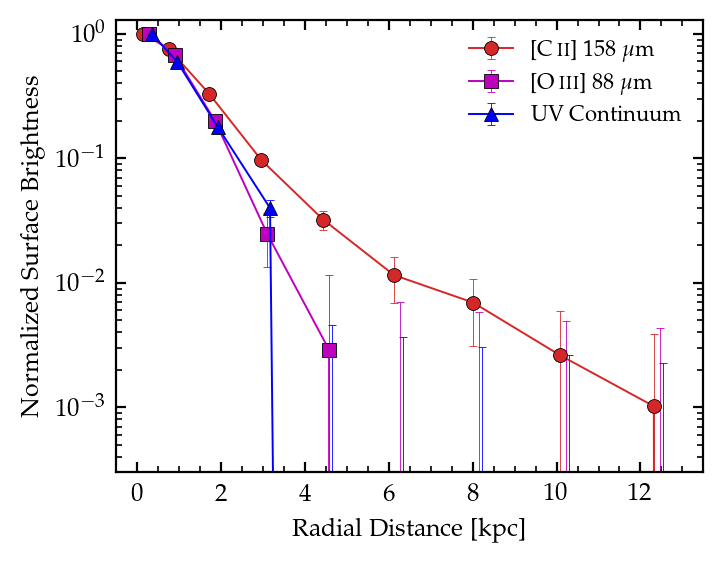

In [9]:
from base import *
fig, ax = plt.subplots(1,1,figsize=(3.5,2.7))

weighting = 'natural_uv0.5'
psfmatch = ('OIII','continuum',weighting)
# bins = np.arange(0.01, 3, 0.1)
bins = np.arange(0.001, 3, 0.2)**1.6

offset = 0.07

im = image('CII','linemfs','natural_uv0.7')
im.Reconstruct()
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
print(sb)
bc = bc/im.cell*im.cell_kpc
ax.errorbar(bc-offset, sb, yerr=sb_err, label=r'[C\,\textsc{ii}] $158~\mu$m', 
             ls='-', linewidth=0.7, color='tab:red', ecolor='tab:red', mec='k', mew=0.3, ms=5, marker='o', capsize=1.5, capthick=0.3, elinewidth=0.3)

im = image('OIII','linemfs',weighting)
im.Reconstruct()
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
bc = bc/im.cell*im.cell_kpc
ax.errorbar(bc+offset, sb, yerr=sb_err, label=r'[O\,\textsc{iii}] $88~\mu$m', 
              ls='-', linewidth=0.7, color='m', ecolor='m', mec='k', mew=0.3, ms=5, marker='s', capsize=1.5, capthick=0.3, elinewidth=0.3)

# im1 = image('CII','continuum','natural_uv0.7')
# im2 = image('NII','continuum',weighting)
# im3 = image('OIII','continuum',weighting)
# im1.Reconstruct()
# im2.Reconstruct()
# im3.Reconstruct()
# bc1, sb1, sb_err1 = im1.RadialProfile(normalized=False, bins=bins)
# bc2, sb2, sb_err2 = im2.RadialProfile(normalized=False, bins=bins)
# bc3, sb3, sb_err3 = im3.RadialProfile(normalized=False, bins=bins)
# bc = bc1
# sb = sb1+sb2+sb3
# sb_err = np.sqrt(sb_err1**2 + sb_err2**2 + sb_err3**2)
# sb_err /= np.max(sb)
# sb /= np.max(sb)
# bc = bc/im.cell*im.cell_kpc
# # sb[sb/sb_err < 2] = np.nan

# ax.errorbar(bc-2*offset, sb, yerr=sb_err, label='Dust Continuum',
#             ls='-', linewidth=0.7, color='g', ecolor='g', mec='k', mew=0.3, ms=5, marker='D', capsize=1.5, capthick=0.3, elinewidth=0.3)


# # # check if band 6 is the only one extended (its not!, but band 7 really isn't which is weird)
# # ax.errorbar(bc1-2*offset, sb1/np.max(sb1), yerr=sb_err1, label='band 6',
# #             ls='-', linewidth=0.7, color='tab:blue', ecolor='tab:blue', mec='k', mew=0.3, ms=5, marker='D', capsize=1.5, capthick=0.3, elinewidth=0.3)
# # ax.errorbar(bc2-2*offset, sb2/np.max(sb2), yerr=sb_err2, label='band 7',
# #             ls='-', linewidth=0.7, color='tab:orange', ecolor='tab:orange', mec='k', mew=0.3, ms=5, marker='D', capsize=1.5, capthick=0.3, elinewidth=0.3)
# # ax.errorbar(bc3-2*offset, sb3/np.max(sb3), yerr=sb_err3, label='band 8',
# #             ls='-', linewidth=0.7, color='tab:green', ecolor='tab:green', mec='k', mew=0.3, ms=5, marker='D', capsize=1.5, capthick=0.3, elinewidth=0.3)


# # bc, sb = get_psf_profile('OIII','continuum',weighting, bins=np.append([0.01,0.175],np.arange(0.18, 4, 0.05)))
# # plt.plot(bc, sb, linestyle='--', color='k', linewidth=0.5)


# # bc, sb = get_psf_profile('OIII','continuum',weighting, bins=np.append([0.01,0.175],np.arange(0.18, 4, 0.05)))
# # ax.plot(bc, sb, linestyle='--', color='k', linewidth=0.5)

im1 = HSTimage('F125W', psfmatch=('OIII','continuum',weighting))
im2 = HSTimage('F160W', psfmatch=('OIII','continuum',weighting))
im1.Reconstruct()
im2.Reconstruct()
bc1, sb1, sb_err1 = im.RadialProfile(normalized=False, bins=bins)
bc2, sb2, sb_err2 = im2.RadialProfile(normalized=False, bins=bins)
bc = bc1
sb = sb1+sb2
sb_err = np.sqrt(sb_err1**2 + sb_err2**2)
sb_err /= np.max(sb)
sb /= np.max(sb)
bc = bc/im.cell*im.cell_kpc

ax.errorbar(bc+2*offset, sb, yerr=sb_err, label='UV Continuum',
            ls='-', linewidth=0.7, color='blue', ecolor='blue', mec='k', mew=0.3, ms=5, marker='^', capsize=1.5, capthick=0.3, elinewidth=0.3)


ax.set_xlabel('Radial Distance [kpc]')
ax.set_ylabel('Normalized Surface Brightness')
ax.semilogy()
ax.legend(fontsize=8)

ax.set_ylim(3e-4, 1.3)
ax.set_xlim(-0.5, 13.5)

ax.tick_params(direction='in', which='both')
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))


# plt.savefig('plots/profiles_radial.pdf')
plt.show()

Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.


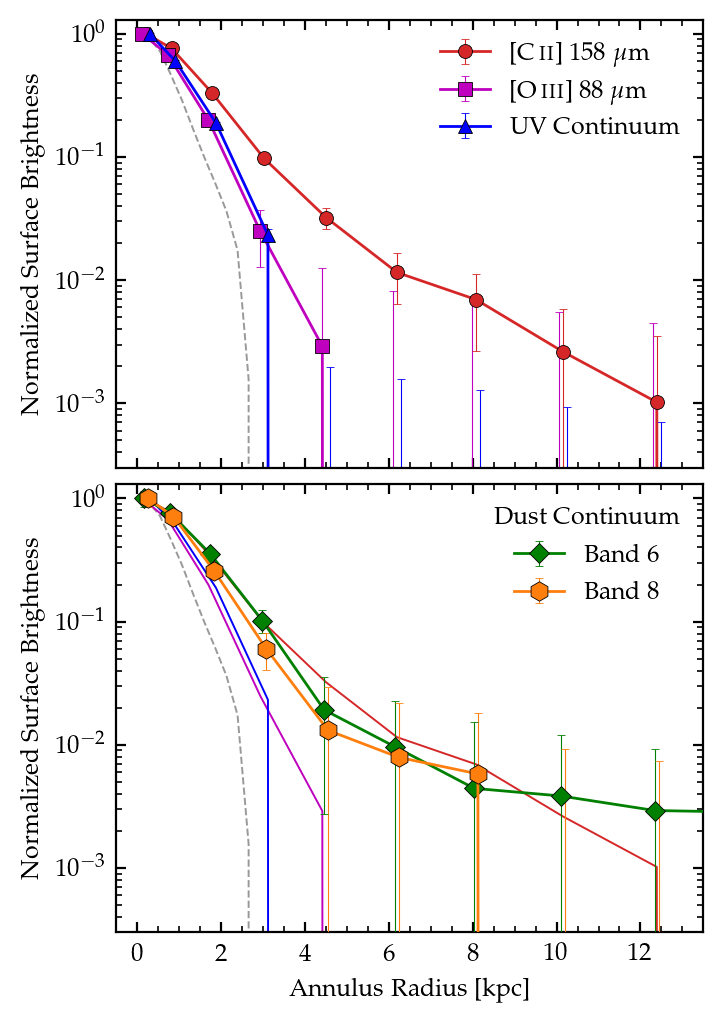

In [1]:
from base import *
fig, ax = plt.subplots(2,1,figsize=(3.5,5), sharex=True)

weighting = 'natural_uv0.5'
psfmatch = ('OIII','continuum',weighting)
bins = np.arange(0.001, 3, 0.2)**1.6
offset_0 = 0.09
offset_1 = 0.5*offset_0

im = image('CII','linemfs','natural_uv0.7')
im.Reconstruct()
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
bc = bc/im.cell*im.cell_kpc
ax[0].errorbar(bc, sb, yerr=sb_err, label=r'[C\,\textsc{ii}] $158~\mu$m', 
               ls='-', linewidth=1, color='tab:red', ecolor='tab:red', mec='k', mew=0.3, ms=5, marker='o', capsize=1.5, capthick=0.4, elinewidth=0.4)

ax[1].plot(bc, sb, color='tab:red', linewidth=0.7)


im = image('OIII','linemfs',weighting)
im.Reconstruct()
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
bc = bc/im.cell*im.cell_kpc
ax[0].errorbar(bc-offset_0, sb, yerr=sb_err, label=r'[O\,\textsc{iii}] $88~\mu$m', 
              ls='-', linewidth=1, color='m', ecolor='m', mec='k', mew=0.3, ms=5, marker='s', capsize=1.5, capthick=0.4, elinewidth=0.4)

ax[1].plot(bc-offset_0, sb, color='m', linewidth=0.7)


im = image('CII','continuum','natural_uv0.7')
im.Reconstruct()
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
bc = bc/im.cell*im.cell_kpc

ax[1].errorbar(bc-offset_1, sb, yerr=sb_err, label='Band 6', zorder=1000,
            ls='-', linewidth=1, color='g', ecolor='g', mec='k', mew=0.3, ms=5, marker='D', capsize=1.5, capthick=0.4, elinewidth=0.4)

# xmin, xmax = 4, 13
# cond = (bc > xmin)&(bc < xmax)
# sb_sum = np.sum(sb[cond])/len(sb[cond])
# sb_sum_err = np.sqrt(np.sum(sb_err[cond]**2))/len(sb[cond])
# ax[1].errorbar([(xmax+xmin)/2], [sb_sum], yerr=[sb_sum_err], xerr=[(xmax-xmin)/2], zorder=1000, color='darkgreen', ecolor='darkgreen', 
#                marker='D', mec='k', mew=0.7, capsize=1.5, capthick=0.7, elinewidth=0.7)


im = image('OIII','continuum',weighting)
im.Reconstruct()
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
bc = bc/im.cell*im.cell_kpc
ax[1].errorbar(bc+offset_1, sb, yerr=sb_err, label='Band 8', zorder=1000,
            ls='-', linewidth=1, color='tab:orange', ecolor='tab:orange', mec='k', mew=0.3, ms=7, marker='h', capsize=1.5, capthick=0.4, elinewidth=0.4)

# xmin, xmax = 4, 8.5
# cond = (bc > xmin)&(bc < xmax)
# sb_sum = np.sum(sb[cond])/len(sb[cond])
# sb_sum_err = np.sqrt(np.sum(sb_err[cond]**2))/len(sb[cond])
# ax[1].errorbar([(xmax+xmin)/2], [sb_sum], yerr=[sb_sum_err], xerr=[(xmax-xmin)/2], zorder=1000, color='#b3590b', ecolor='#b3590b', 
#                marker='h', mec='k', mew=0.7, capsize=1.5, capthick=0.7, elinewidth=0.7)


im1 = HSTimage('F125W', psfmatch=('OIII','continuum',weighting))
im2 = HSTimage('F160W', psfmatch=('OIII','continuum',weighting))
im1.Reconstruct()
im2.Reconstruct()
bc1, sb1, sb_err1 = im1.RadialProfile(normalized=False, bins=bins)
bc2, sb2, sb_err2 = im2.RadialProfile(normalized=False, bins=bins)
bc = bc1
sb = sb1+sb2
sb_err = np.sqrt(sb_err1**2 + sb_err2**2)
sb_err /= np.max(sb)
sb /= np.max(sb)
bc = bc/im.cell*im.cell_kpc

ax[0].errorbar(bc+offset_0, sb, yerr=sb_err, label='UV Continuum',
            ls='-', linewidth=1, color='blue', ecolor='blue', mec='k', mew=0.3, ms=5, marker='^', capsize=1.5, capthick=0.4, elinewidth=0.4)
ax[1].plot(bc+offset_0, sb, color='blue', linewidth=0.7)

psf = fits.open('Imaging/OIII/Continuum/A1689-zD1_OIII_continuum_natural_uv0.5_psf.fits')[0]
im = image('OIII','continuum',weighting)
im.data = psf.data[0][0]
im.Reconstruct()
y0,x0 = np.unravel_index(np.nanargmax(im.data), im.data.shape)
im.x0, im.y0 = x0, y0
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=np.append(1.5e-5, np.arange(7.68e-2, 1, 0.05)))
bc = bc/im.cell*im.cell_kpc
ax[0].plot(bc, sb, color='0.6', linewidth=0.7, linestyle='--', zorder=0)
ax[1].plot(bc, sb, color='0.6', linewidth=0.7, linestyle='--', zorder=0)


ax[0].set_ylabel('Normalized Surface Brightness')
ax[1].set_ylabel('Normalized Surface Brightness')
ax[1].set_xlabel('Annulus Radius [kpc]')

ax[0].semilogy()
ax[1].semilogy()
ax[0].legend(loc='upper right', fontsize=9)
ax[1].legend(loc='upper right', fontsize=9, title='Dust Continuum')

ax[0].set_ylim(3e-4, 1.3)
ax[1].set_ylim(3e-4, 1.3)
ax[0].set_xlim(-0.5, 13.5)

ax[0].tick_params(direction='in', which='both')
ax[1].tick_params(direction='in', which='both')
ax[0].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax[1].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

plt.savefig('plots/profiles_radial_splane.pdf')
plt.show()

Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.


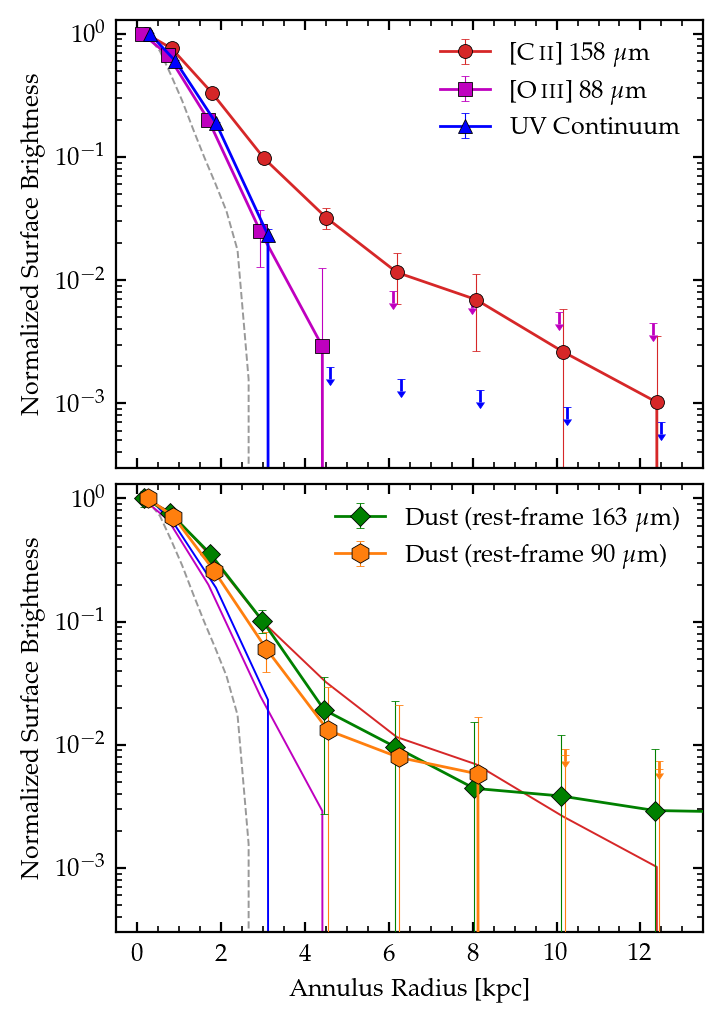

In [9]:
from base import *
fig, ax = plt.subplots(2,1,figsize=(3.5,5), sharex=True)

weighting = 'natural_uv0.5'
psfmatch = ('OIII','continuum',weighting)
bins = np.arange(0.001, 3, 0.2)**1.6
offset_0 = 0.09
offset_1 = 0.5*offset_0

im = image('CII','linemfs','natural_uv0.7')
im.Reconstruct()
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
bc = bc/im.cell*im.cell_kpc

sb_err1 = copy(sb_err)
sb_err1[sb==0] = 0
ax[0].errorbar(bc, sb, yerr=sb_err1, label=r'[C\,\textsc{ii}] $158~\mu$m', 
               ls='-', linewidth=1, color='tab:red', ecolor='tab:red', mec='k', mew=0.3, ms=5, marker='o', capsize=1.5, capthick=0.4, elinewidth=0.4)
ax[0].errorbar(bc[sb==0], sb_err[sb==0], yerr=0.2*sb_err[sb==0], uplims=True,
               linewidth=0, color='tab:red', ecolor='tab:red', mec='k', mew=0.3, ms=5, capsize=1.5, capthick=0.4, elinewidth=1)

ax[1].plot(bc, sb, color='tab:red', linewidth=0.7)


im = image('OIII','linemfs',weighting)
im.Reconstruct()
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
bc = bc/im.cell*im.cell_kpc

sb_err1 = copy(sb_err)
sb_err1[sb==0] = 0
ax[0].errorbar(bc-offset_0, sb, yerr=sb_err1, label=r'[O\,\textsc{iii}] $88~\mu$m', 
              ls='-', linewidth=1, color='m', ecolor='m', mec='k', mew=0.3, ms=5, marker='s', capsize=1.5, capthick=0.4, elinewidth=0.4)
ax[0].errorbar(bc[sb==0]-offset_0, sb_err[sb==0], yerr=0.2*sb_err[sb==0], uplims=True,
               linewidth=0, color='m', ecolor='m', mec='k', mew=0.3, ms=5, capsize=1.5, capthick=0.4, elinewidth=1)

ax[1].plot(bc-offset_0, sb, color='m', linewidth=0.7)


im = image('CII','continuum','natural_uv0.7')
im.Reconstruct()
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
bc = bc/im.cell*im.cell_kpc

sb_err1 = copy(sb_err)
sb_err1[sb==0] = 0
ax[1].errorbar(bc-offset_1, sb, yerr=sb_err1, label=r'Dust (rest-frame $163~\mu$m)', zorder=1000,
            ls='-', linewidth=1, color='g', ecolor='g', mec='k', mew=0.3, ms=5, marker='D', capsize=1.5, capthick=0.4, elinewidth=0.4)
ax[1].errorbar(bc[sb==0]-offset_1, sb_err[sb==0], yerr=0.2*sb_err[sb==0], uplims=True,
               linewidth=0, color='g', ecolor='g', mec='k', mew=0.3, ms=5, capsize=1.5, capthick=0.4, elinewidth=1)


# # xmin, xmax = 4, 13
# # cond = (bc > xmin)&(bc < xmax)
# # sb_sum = np.sum(sb[cond])/len(sb[cond])
# # sb_sum_err = np.sqrt(np.sum(sb_err[cond]**2))/len(sb[cond])
# # ax[1].errorbar([(xmax+xmin)/2], [sb_sum], yerr=[sb_sum_err], xerr=[(xmax-xmin)/2], zorder=1000, color='darkgreen', ecolor='darkgreen', 
# #                marker='D', mec='k', mew=0.7, capsize=1.5, capthick=0.7, elinewidth=0.7)

sb_err1 = copy(sb_err)
sb_err1[sb==0] = 0
im = image('OIII','continuum',weighting)
im.Reconstruct()
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
bc = bc/im.cell*im.cell_kpc
ax[1].errorbar(bc+offset_1, sb, yerr=sb_err1, label=r'Dust (rest-frame $90~\mu$m)', zorder=1000,
               ls='-', linewidth=1, color='tab:orange', ecolor='tab:orange', mec='k', mew=0.3, ms=7, marker='h', capsize=1.5, capthick=0.4, elinewidth=0.4)
ax[1].errorbar(bc[sb==0]+offset_1, sb_err[sb==0], yerr=0.2*sb_err[sb==0], uplims=True,
               linewidth=0, color='tab:orange', ecolor='tab:orange', mec='k', mew=0.3, ms=5, capsize=1.5, capthick=0.4, elinewidth=1)


# # xmin, xmax = 4, 8.5
# # cond = (bc > xmin)&(bc < xmax)
# # sb_sum = np.sum(sb[cond])/len(sb[cond])
# # sb_sum_err = np.sqrt(np.sum(sb_err[cond]**2))/len(sb[cond])
# # ax[1].errorbar([(xmax+xmin)/2], [sb_sum], yerr=[sb_sum_err], xerr=[(xmax-xmin)/2], zorder=1000, color='#b3590b', ecolor='#b3590b', 
# #                marker='h', mec='k', mew=0.7, capsize=1.5, capthick=0.7, elinewidth=0.7)


im1 = HSTimage('F125W', psfmatch=('OIII','continuum',weighting))
im2 = HSTimage('F160W', psfmatch=('OIII','continuum',weighting))
im1.Reconstruct()
im2.Reconstruct()
bc1, sb1, sb_err1 = im1.RadialProfile(normalized=False, bins=bins)
bc2, sb2, sb_err2 = im2.RadialProfile(normalized=False, bins=bins)
bc = bc1
sb = sb1+sb2
sb_err = np.sqrt(sb_err1**2 + sb_err2**2)
sb_err /= np.max(sb)
sb /= np.max(sb)
bc = bc/im.cell*im.cell_kpc

sb_err1 = copy(sb_err)
sb_err1[sb==0] = 0
ax[0].errorbar(bc+offset_0, sb, yerr=sb_err1, label='UV Continuum',
            ls='-', linewidth=1, color='blue', ecolor='blue', mec='k', mew=0.3, ms=5, marker='^', capsize=1.5, capthick=0.4, elinewidth=0.4)
ax[0].errorbar(bc[sb==0]+offset_0, sb_err[sb==0], yerr=0.2*sb_err[sb==0], uplims=True,
               linewidth=0, color='blue', ecolor='blue', mec='k', mew=0.3, ms=5, capsize=1.5, capthick=0.4, elinewidth=1)

ax[1].plot(bc+offset_0, sb, color='blue', linewidth=0.7)

psf = fits.open('Imaging/OIII/Continuum/A1689-zD1_OIII_continuum_natural_uv0.5_psf.fits')[0]
im = image('OIII','continuum',weighting)
im.data = psf.data[0][0]
im.Reconstruct()
y0,x0 = np.unravel_index(np.nanargmax(im.data), im.data.shape)
im.x0, im.y0 = x0, y0
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=np.append(1.5e-5, np.arange(7.68e-2, 1, 0.05)))
bc = bc/im.cell*im.cell_kpc
ax[0].plot(bc, sb, color='0.6', linewidth=0.7, linestyle='--', zorder=0)
ax[1].plot(bc, sb, color='0.6', linewidth=0.7, linestyle='--', zorder=0)


ax[0].set_ylabel('Normalized Surface Brightness')
ax[1].set_ylabel('Normalized Surface Brightness')
ax[1].set_xlabel('Annulus Radius [kpc]')

ax[0].semilogy()
ax[1].semilogy()
ax[0].legend(loc='upper right', fontsize=9)
ax[1].legend(loc='upper right', fontsize=9)

ax[0].set_ylim(3e-4, 1.3)
ax[1].set_ylim(3e-4, 1.3)
ax[0].set_xlim(-0.5, 13.5)

ax[0].tick_params(direction='in', which='both')
ax[1].tick_params(direction='in', which='both')
ax[0].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax[1].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

plt.savefig('plots/profiles_radial_splane.pdf')
plt.show()

In [157]:
im = image('CII','linemfs','natural_uv0.7')
im.Reconstruct()
bc, sb, sb_err = im.RadialProfile(normalized=True, bins=bins)
bc = bc/im.cell*im.cell_kpc

Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.


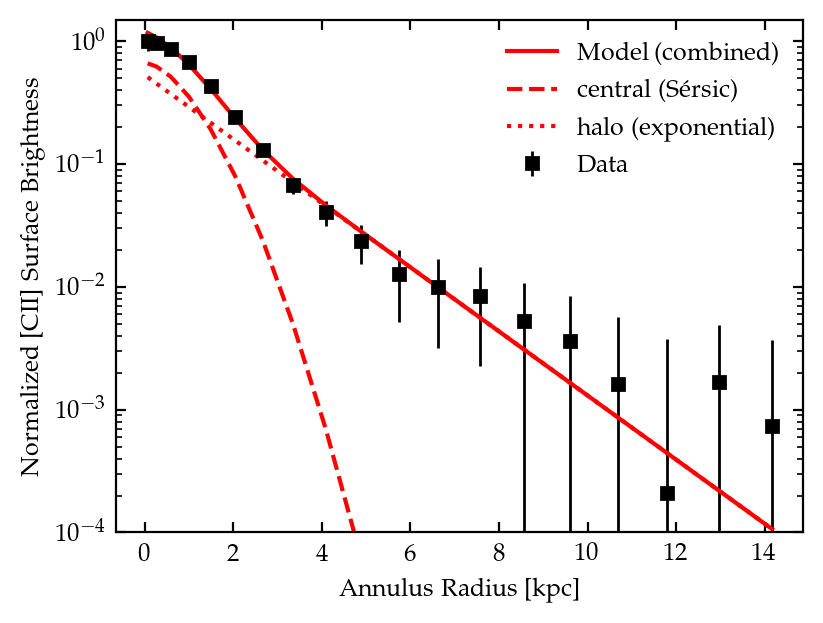

In [172]:
from astropy.modeling.models import Sersic1D
from astropy.modeling.fitting import LevMarLSQFitter

x = bc[sb != 0]
y = sb[sb != 0]
err = sb_err[sb != 0]

mod1 = Sersic1D(amplitude=0.2, r_eff=p1.r_eff, n=p1.n, 
                fixed={'amplitude':False, 'r_eff':True, 'n':True}, 
                bounds={'amplitude':(0,np.inf), 'r_eff':(0, np.inf), 'n':(0, np.inf)})

mod2 = Sersic1D(amplitude=0.2, r_eff=5, n=1, 
                fixed={'amplitude':False, 'r_eff':False, 'n':True}, 
                bounds={'amplitude':(0,np.inf), 'r_eff':(0, np.inf), 'n':(0, np.inf)}) 
mod = mod1+mod2

fit_mod = LevMarLSQFitter()

p = fit_mod(mod, x, y, weights=1/err, maxiter=100000)
p_central = Sersic1D(amplitude=p.amplitude_0, r_eff=p.r_eff_0, n=p.n_0)
p_halo = Sersic1D(amplitude=p.amplitude_1, r_eff=p.r_eff_1, n=p.n_1)

# Plot the data with the best-fit model
plt.figure(figsize=(4,3))
plt.errorbar(x, y, yerr=err, linewidth=0, elinewidth=1, label='Data', marker='s', color='k', markersize=4)
plt.plot(x, p(x), color='r', label='Model (combined)')
plt.plot(x, p_central(x), linestyle='--', color='r', label='\t central (Sérsic)')
plt.plot(x, p_halo(x), linestyle=':', color='r', label='halo (exponential)')
plt.semilogy()
plt.ylim(1e-4, 1.5)
plt.legend()
plt.ylabel('Normalized [CII] Surface Brightness')
plt.xlabel('Annulus Radius [kpc]')
plt.tick_params(direction='in', which='both')
plt.show()

In [161]:
print(f'R_e for central component: {p_central.r_eff.value:.2f} kpc')
print(f'R_e for halo component: {p_halo.r_eff.value:.2f} kpc')

R_e for central component: 1.21 kpc
R_e for halo component: 2.79 kpc


## Gini Coefficients

### Image plane

In [4]:
from base import *

def calc_Gs(weighting,R,reconstruct=False):
    psfmatch = ('OIII','continuum',weighting)
    if weighting=='natural_uv0':
        cii_weighting='natural_uv0.3'
    if weighting=='natural_uv0.5':
        cii_weighting='natural_uv0.7'

        
    hstim1 = HSTimage('F125W',psfmatch=('OIII','continuum',weighting))
    hstim2 = HSTimage('F160W',psfmatch=('OIII','continuum',weighting)) 
    data = hstim1.data + hstim2.data
    std = np.sqrt(hstim1.std**2 + hstim2.std**2)
    hstim1.data, hstim1.std = data, std
    
    images = [image('CII','linemfs',cii_weighting),
             image('OIII','linemfs',weighting),
             image('CII','continuum',cii_weighting),
             #image('NII','continuum',weighting),
             image('OIII','continuum',weighting),
             hstim1]

    names = [r'$[{\rm C}\,\textsc{ii}]$',r'$[{\rm O}\,\textsc{iii}]$',r'Dust ($163~\mu$m)', r'Dust ($90~\mu$m)','UV']
    colors = ['r','m','g','tab:orange','b']
    
    print('Imported data')
    
    G, G_err = np.array([]),np.array([])
    beamarea = np.array([])
    for im, name in zip(images,names):
        
        if reconstruct:
            im.Reconstruct()
            
        data = copy(im.data)
        std = im.std
        
        beamarea = np.append(beamarea, im.BeamArea)
        
        data[im.dists > R] = np.nan    
        X = data.flatten()
        X = X[~np.isnan(X)]
        X_unsorted = X
        X = np.sort(X)
        n = len(X)
        i = np.arange(n)
        G = np.append(G,(1/(np.abs(np.mean(X))*n*(n-1)))*np.sum((2*i-n-1)*np.abs(X)))
        
        data = copy(im.data)
        if reconstruct:
            newR = 1
        else:
            newR = 3
        data[im.dists < newR] = np.nan
        
        G_rand = np.array([])
        for m in range(500):
            X_sample = np.random.normal(loc=0, scale=std, size=n) + X_unsorted
            X = X_sample
            X = np.sort(X)
            i = np.arange(n)
            G_rand = np.append(G_rand, (1/(np.abs(np.mean(X))*n*(n-1)))*np.sum((2*i-n-1)*np.abs(X)))
        
        G_err = np.append(G_err, np.std(G_rand))
        
    return names, G, G_err, colors, beamarea

In [2]:
names, G, G_err, c, beamarea = calc_Gs('natural_uv0.5', R=2)

Imported data


/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


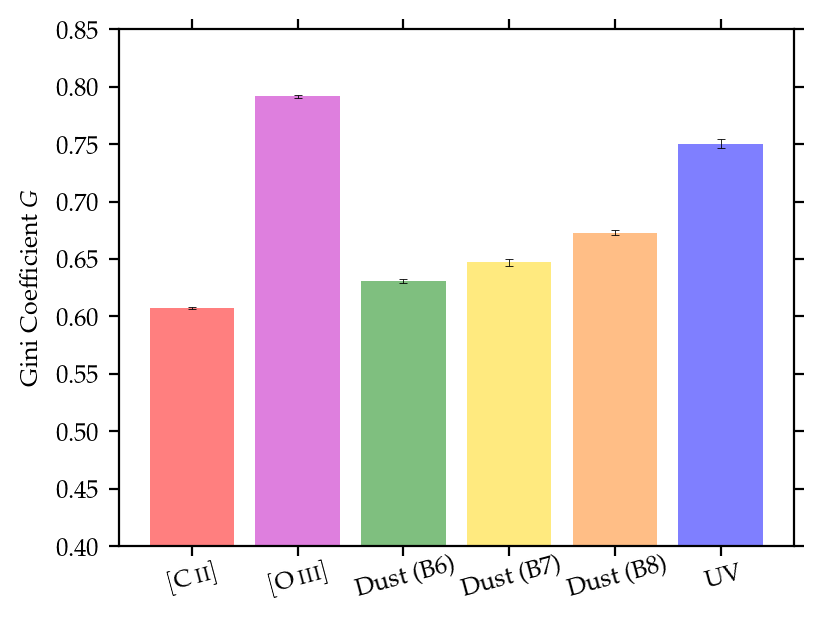

In [3]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.bar(names, G, color=c, alpha=0.5)
ax.errorbar(range(len(G)), G, yerr=G_err, 
            ms=0, linewidth=0, ecolor='k', capsize=1.5, capthick=0.3, elinewidth=0.3)
ax.set_xticklabels(names, rotation=15, ha="center", rotation_mode="anchor")
ax.set_ylabel('Gini Coefficient $G$')
ax.set_ylim(0.4,0.85)
plt.savefig('gini.pdf')
plt.show()

### source plane

In [6]:
names, G, G_err, c, beamarea = calc_Gs('natural_uv0.5', R=0.8, reconstruct=True)

Imported data
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.


/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


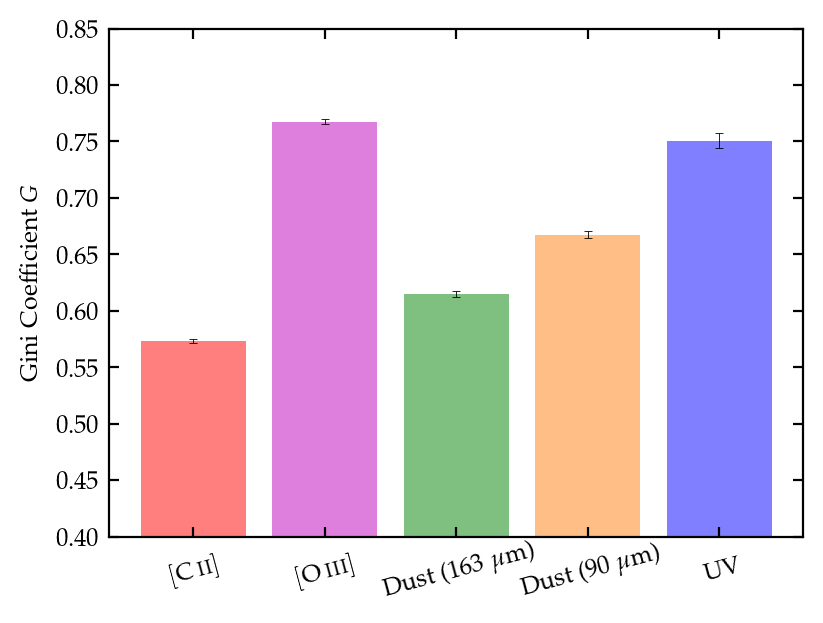

In [7]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.bar(names, G, color=c, alpha=0.5)
ax.errorbar(range(len(G)), G, yerr=G_err, 
            ms=0, linewidth=0, ecolor='k', capsize=1.5, capthick=0.3, elinewidth=0.3)
ax.set_xticklabels(names, rotation=15, ha="center", rotation_mode="anchor")
ax.tick_params(axis='x', which='major', pad=8)
ax.set_ylabel('Gini Coefficient $G$')
ax.set_ylim(0.4,0.85)
ax.tick_params(direction='in', which='both')

plt.savefig('gini_splane.pdf')
plt.show()

## Cumulative Profiles

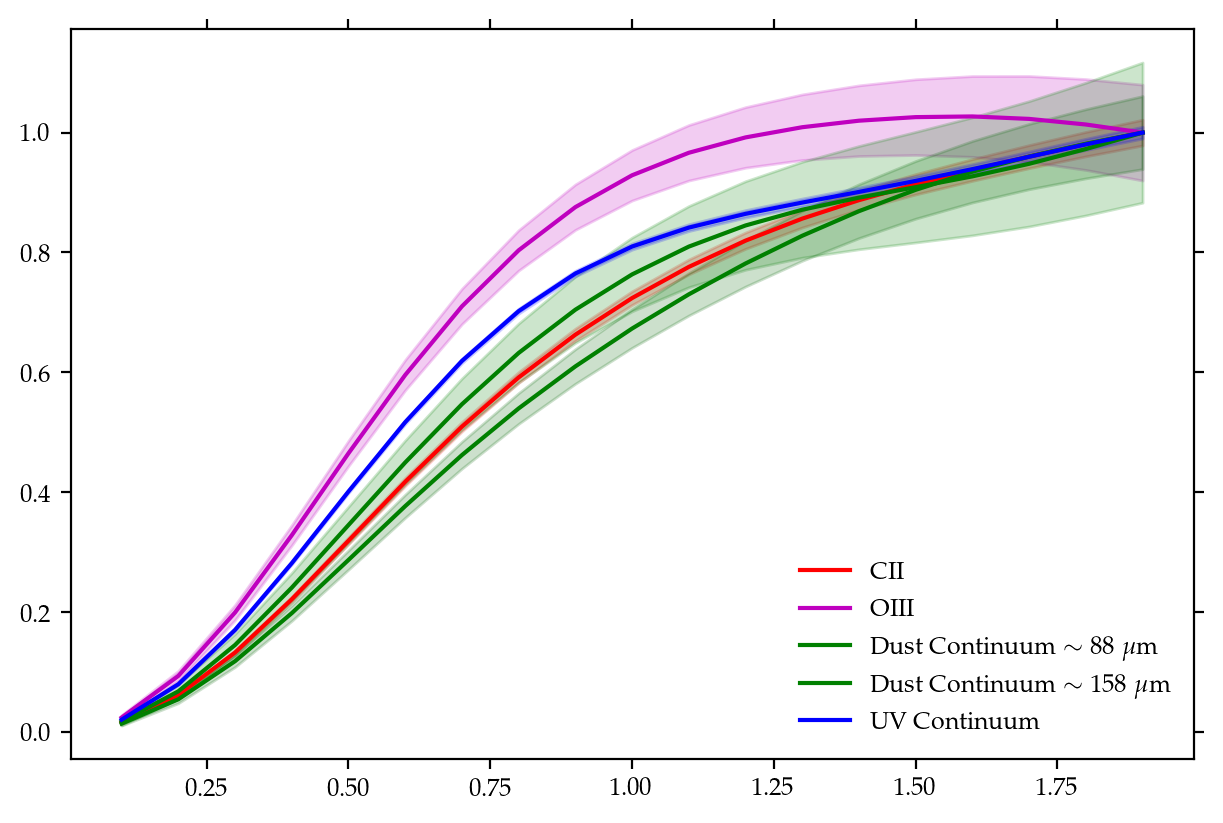

In [28]:
from base import *

fig, ax = plt.subplots(1,1)

radii = np.arange(0.1, 2, 0.1)
# radii = np.power(2, np.arange(-3, 2, 0.15))
weighting = 'natural_uv0.5'

im = image('CII','linemfs',weighting)
radii, cflux, cflux_err = im.GrowthCurve(radii=radii)
ax.plot(radii, cflux, color='r', label='CII')
ax.fill_between(radii, cflux-cflux_err, cflux+cflux_err, color='r', alpha=0.2)

im = image('OIII','linemfs',weighting)
radii, cflux, cflux_err = im.GrowthCurve(radii=radii)
ax.plot(radii, cflux, color='m', label='OIII')
ax.fill_between(radii, cflux-cflux_err, cflux+cflux_err, color='m', alpha=0.2)


im = image('OIII','continuum',weighting)
radii, cflux, cflux_err = im.GrowthCurve(radii=radii)
ax.plot(radii, cflux, color='g', label=r'Dust Continuum $\sim 88~\mu$m')
ax.fill_between(radii, cflux-cflux_err, cflux+cflux_err, color='g', alpha=0.2)


im = image('CII','continuum',weighting)
radii, cflux, cflux_err = im.GrowthCurve(radii=radii)
ax.plot(radii, cflux, color='g', label=r'Dust Continuum $\sim 158~\mu$m')
ax.fill_between(radii, cflux-cflux_err, cflux+cflux_err, color='darkgreen', alpha=0.2)

im = HSTimage(psfmatch=('OIII','continuum',weighting), nan_treatment='fill')
# im.x0, im.y0 = 131, 127
radii, cflux, cflux_err = im.GrowthCurve(radii=radii)
# std = np.std(im.data[(im.dists > 1/im.cell)&(im.dists < 4/im.cell)])
# cflux_err = std*np.pi*(radii/im.cell)**2
ax.plot(radii, cflux, color='b', label='UV Continuum')
ax.fill_between(radii, cflux-cflux_err, cflux+cflux_err, color='b', alpha=0.2)


plt.legend(loc='lower right')
plt.show()